In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('nfldata2015.csv')

rusher = 'A.Peterson'

left = {}
left_count = {}
right = {}
right_count = {}
middle = {}
middle_count = {}


            
count = 0
for x in df['Rusher']:
    count = count + 1
    
df['RunGap'] = df['RunGap'].fillna('No Gap')    



/Users/DTrinh/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
for x in range(count):
    if df['Rusher'][x] == rusher:      
        if df['RunLocation'][x] == 'left':
            if df['RunGap'][x] in left:
                left[df['RunGap'][x]] = left[df['RunGap'][x]] + df['Yards.Gained'][x]
            else:
                left[df['RunGap'][x]] = df['Yards.Gained'][x]
        if df['RunLocation'][x] == 'left':
            if df['RunGap'][x] in left_count:
                left_count[df['RunGap'][x]] = left_count[df['RunGap'][x]] + 1
            else:
                left_count[df['RunGap'][x]] = 1
        if df['RunLocation'][x] == 'right':
            if df['RunGap'][x] in right:
                right[df['RunGap'][x]] = right[df['RunGap'][x]] + df['Yards.Gained'][x]
            else:
                right[df['RunGap'][x]] = df['Yards.Gained'][x]
        if df['RunLocation'][x] == 'right':
            if df['RunGap'][x] in right_count:
                right_count[df['RunGap'][x]] = right_count[df['RunGap'][x]] + 1
            else:
                right_count[df['RunGap'][x]] = 1
        if df['RunLocation'][x] == 'middle':
            if df['RunGap'][x] in middle:
                middle[df['RunGap'][x]] = middle[df['RunGap'][x]] + df['Yards.Gained'][x]
            else:
                middle[df['RunGap'][x]] = df['Yards.Gained'][x]
        if df['RunLocation'][x] == 'middle':
            if df['RunGap'][x] in middle_count:
                middle_count[df['RunGap'][x]] = middle_count[df['RunGap'][x]] + 1
            else:
                middle_count[df['RunGap'][x]] = 1
                
                
print(rusher)
print('left yards', left)
print('left_count', left_count)
print('middle yards', middle)
print('middle_count', middle_count)
print('right yards', right)
print('right_count', right_count)            



A.Peterson
left yards {'end': 120, 'tackle': 93, 'guard': 161}
left_count {'end': 23, 'tackle': 36, 'guard': 34}
middle yards {'No Gap': 419}
middle_count {'No Gap': 107}
right yards {'end': 178, 'tackle': 246, 'guard': 270}
right_count {'end': 36, 'tackle': 44, 'guard': 41}


In [3]:


left_end = (left['end']/left_count['end'])
left_tackle = (left['tackle']/left_count['tackle'])
left_guard = (left['guard']/left_count['guard'])
center = ((middle['No Gap'])/(middle_count['No Gap']))
right_guard = (right['guard']/right_count['guard'])
right_tackle = (right['tackle']/right_count['tackle'])
right_end = (right['end']/right_count['end'])
gaps = [left_end, left_tackle, left_guard, center, right_guard, right_tackle, right_end ]
print(gaps)



[5.2173913043478262, 2.5833333333333335, 4.7352941176470589, 3.9158878504672896, 6.5853658536585362, 5.5909090909090908, 4.9444444444444446]


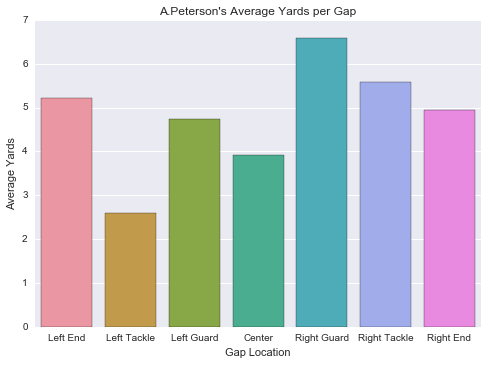

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")
gap_titles = ['Left End', 'Left Tackle', 'Left Guard', 'Center', 'Right Guard', 'Right Tackle', 'Right End' ]
gap_count = [left_count['end'], left_count['tackle'], left_count['guard'], middle_count['No Gap'], right_count['guard'], right_count['tackle'], right_count['end']]





ax1 = sns.barplot(gap_titles, gaps)
ax1.set(xlabel = 'Gap Location', ylabel = 'Average Yards', title = rusher + '\'s Average Yards per Gap')

sns.plt.show()



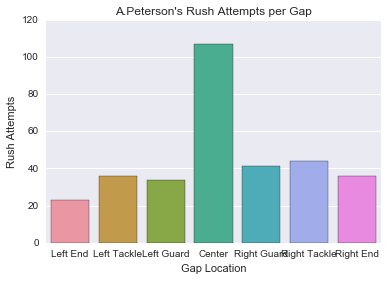

In [7]:
%matplotlib inline
ax2 = sns.barplot(gap_titles, gap_count)
ax2.set(xlabel = 'Gap Location', ylabel = 'Rush Attempts', title = rusher + '\'s Rush Attempts per Gap')

sns.plt.show()